# Avocados

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


Importing Librery 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools


In [5]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [6]:
df.shape

(18249, 14)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

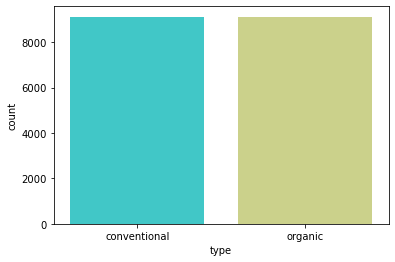

In [12]:
sns.countplot(x=df["type"],palette="rainbow")

it show that conventionalhave 900+avocado each


<AxesSubplot:xlabel='type', ylabel='count'>

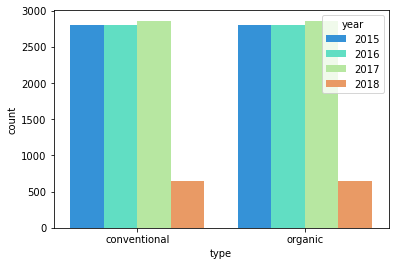

In [13]:
sns.countplot(x=df["type"],palette="rainbow",hue=df["year"])

Ghrapichal repersantation of Avocados according th year
we can see the sales very less in year 2018

In [14]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

checking the corrlation

In [15]:
df_corr=df.corr()
df_corr

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


Display the correlation of all the independt variables with the target value

<AxesSubplot:>

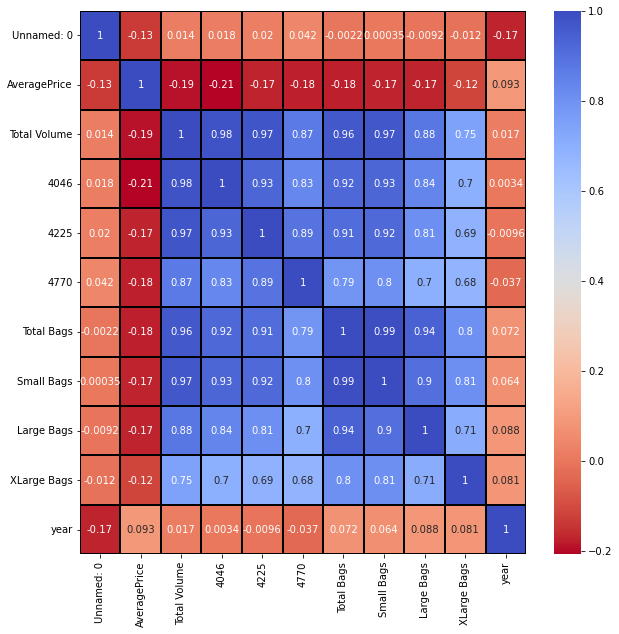

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linecolor="black", linewidths=2, cmap="coolwarm_r")

checking Outlier:

In [17]:
df.quantile([0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,1]).T

,0.05,0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1.00
Unnamed: 0,2.000,4.000,8.000,10.00,12.000,18.000,24.00,29.000,35.000,38.00,41.000,46.000,49.000,5.000000e+01,5.000000e+01,5.100000e+01,5.100000e+01,52.00
AveragePrice,0.830,0.930,1.050,1.10,1.150,1.260,1.37,1.480,1.600,1.66,1.740,1.930,2.110,2.170000e+00,2.250000e+00,2.340000e+00,2.540000e+00,3.25
Total Volume,2371.862,3896.768,8168.866,10838.58,15181.304,42137.088,107376.76,192430.124,319613.142,432962.29,604868.968,1387045.760,3716315.410,4.457324e+06,5.411527e+06,6.303591e+06,8.376759e+06,62505646.52
4046,19.600,94.276,483.362,854.07,1368.118,3261.580,8645.30,31698.078,77991.410,111020.20,152679.068,538385.184,1263359.678,1.815998e+06,2.276946e+06,2.805307e+06,4.059374e+06,22743616.17
4225,103.614,367.484,1918.532,3008.78,4265.508,10961.994,29061.02,53202.052,98296.168,150206.86,222163.620,500784.552,1303657.658,1.566151e+06,1.858844e+06,2.261075e+06,3.791560e+06,20470572.61
4770,0.000,0.000,0.000,0.00,0.000,42.704,184.99,768.782,3466.120,6243.42,10972.600,31492.442,106156.574,1.282828e+05,1.618103e+05,2.371003e+05,4.527798e+05,2546439.11
Total Bags,628.890,1299.208,3347.674,5088.64,7316.634,16643.260,39743.83,62361.468,88901.748,110783.37,149306.360,442141.928,1005478.892,1.180500e+06,1.407423e+06,1.846537e+06,3.232558e+06,19373134.37
Small Bags,256.670,583.110,1686.086,2849.42,4761.328,11502.076,26362.82,46725.754,68884.094,83337.67,104537.112,354266.852,768147.228,9.123473e+05,1.124550e+06,1.436144e+06,2.306055e+06,13384586.80
Large Bags,0.000,0.000,30.918,127.47,329.944,1105.110,2647.71,6087.796,14392.206,22029.25,34350.986,94295.338,195699.768,2.527005e+05,3.420543e+05,5.232908e+05,1.053996e+06,5719096.61
XLarge Bags,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,20.252,132.50,557.114,3688.912,12058.452,1.696502e+04,2.537550e+04,3.944922e+04,6.476548e+04,551693.65


the presented methiod to detect outlier of the dataset

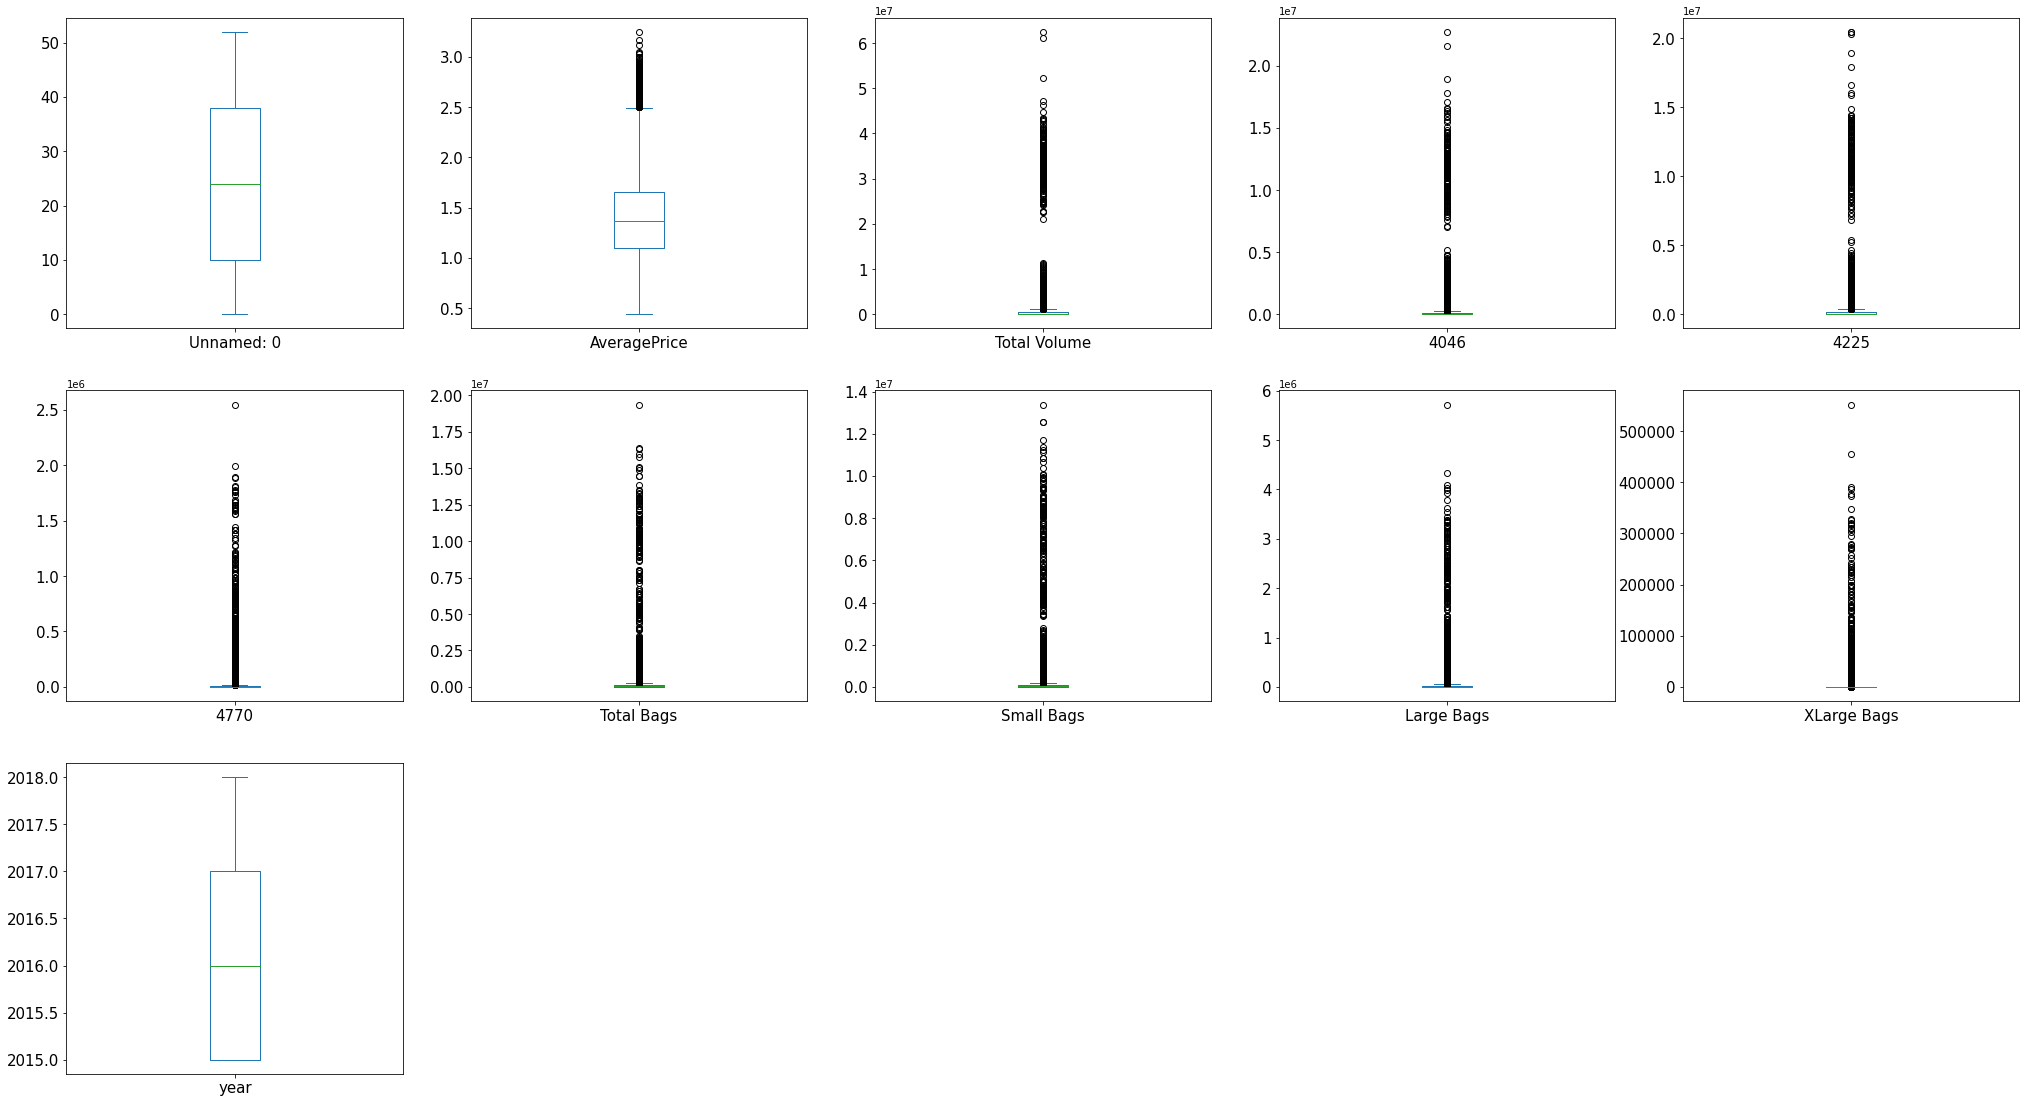

In [18]:
df.plot(kind="box", subplots=True, layout=(6,5), figsize=(35,40), fontsize=15)
plt.show()

Ghraphical repersetation of boxplot showing the present of outlier in diffret
present many outlier in the dataset

# checking skew

In [19]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

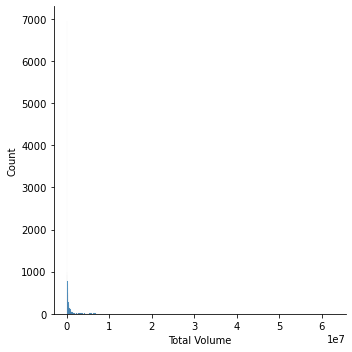

In [20]:
sns.displot(df["Total Volume"])

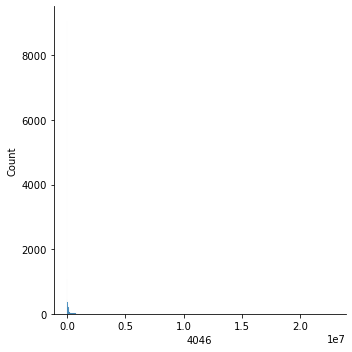

In [21]:
sns.displot(df["4046"])

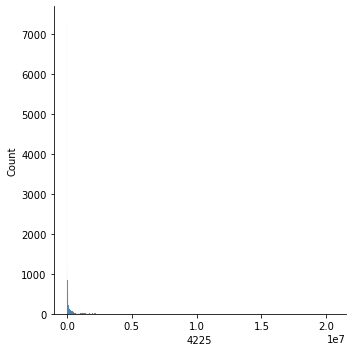

In [22]:
sns.displot(df["4225"])

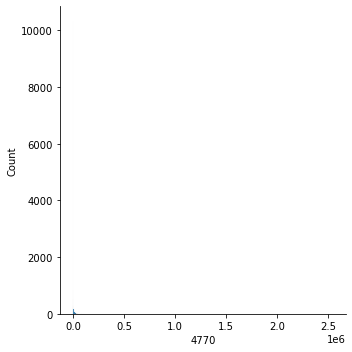

In [23]:
sns.displot(df["4770"])

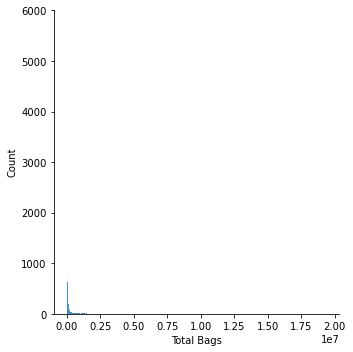

In [24]:
sns.displot(df["Total Bags"])

# Data cleaning:

In [25]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [26]:
df.drop(columns=["Unnamed: 0","Small Bags","Large Bags","XLarge Bags"], inplace=True)

here we are droped many column because to avoied multicollinearty

In [27]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico


In [28]:
df["Day"]= pd.DatetimeIndex(df["Date"]).year

In [29]:
df["Month"]= pd.DatetimeIndex(df["Date"]).year

In [30]:
df["Year"]= pd.DatetimeIndex(df["Date"]).year

In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,2015,2015,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,2015,2015,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,2015,2015,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,2015,2015,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,2015,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico,2018,2018,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico,2018,2018,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico,2018,2018,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico,2018,2018,2018


In [32]:
df.drop(columns=["Date","year"],inplace=True)

droping the date and year column to avoid the multicollinearity

In [33]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany,2015,2015,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany,2015,2015,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany,2015,2015,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany,2015,2015,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany,2015,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,WestTexNewMexico,2018,2018,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,WestTexNewMexico,2018,2018,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,WestTexNewMexico,2018,2018,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,WestTexNewMexico,2018,2018,2018


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
lab=LabelEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,2015,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,2015,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,2015,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,2015,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2018,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,2018,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,2018,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,2018,2018


# Outlier Treatment

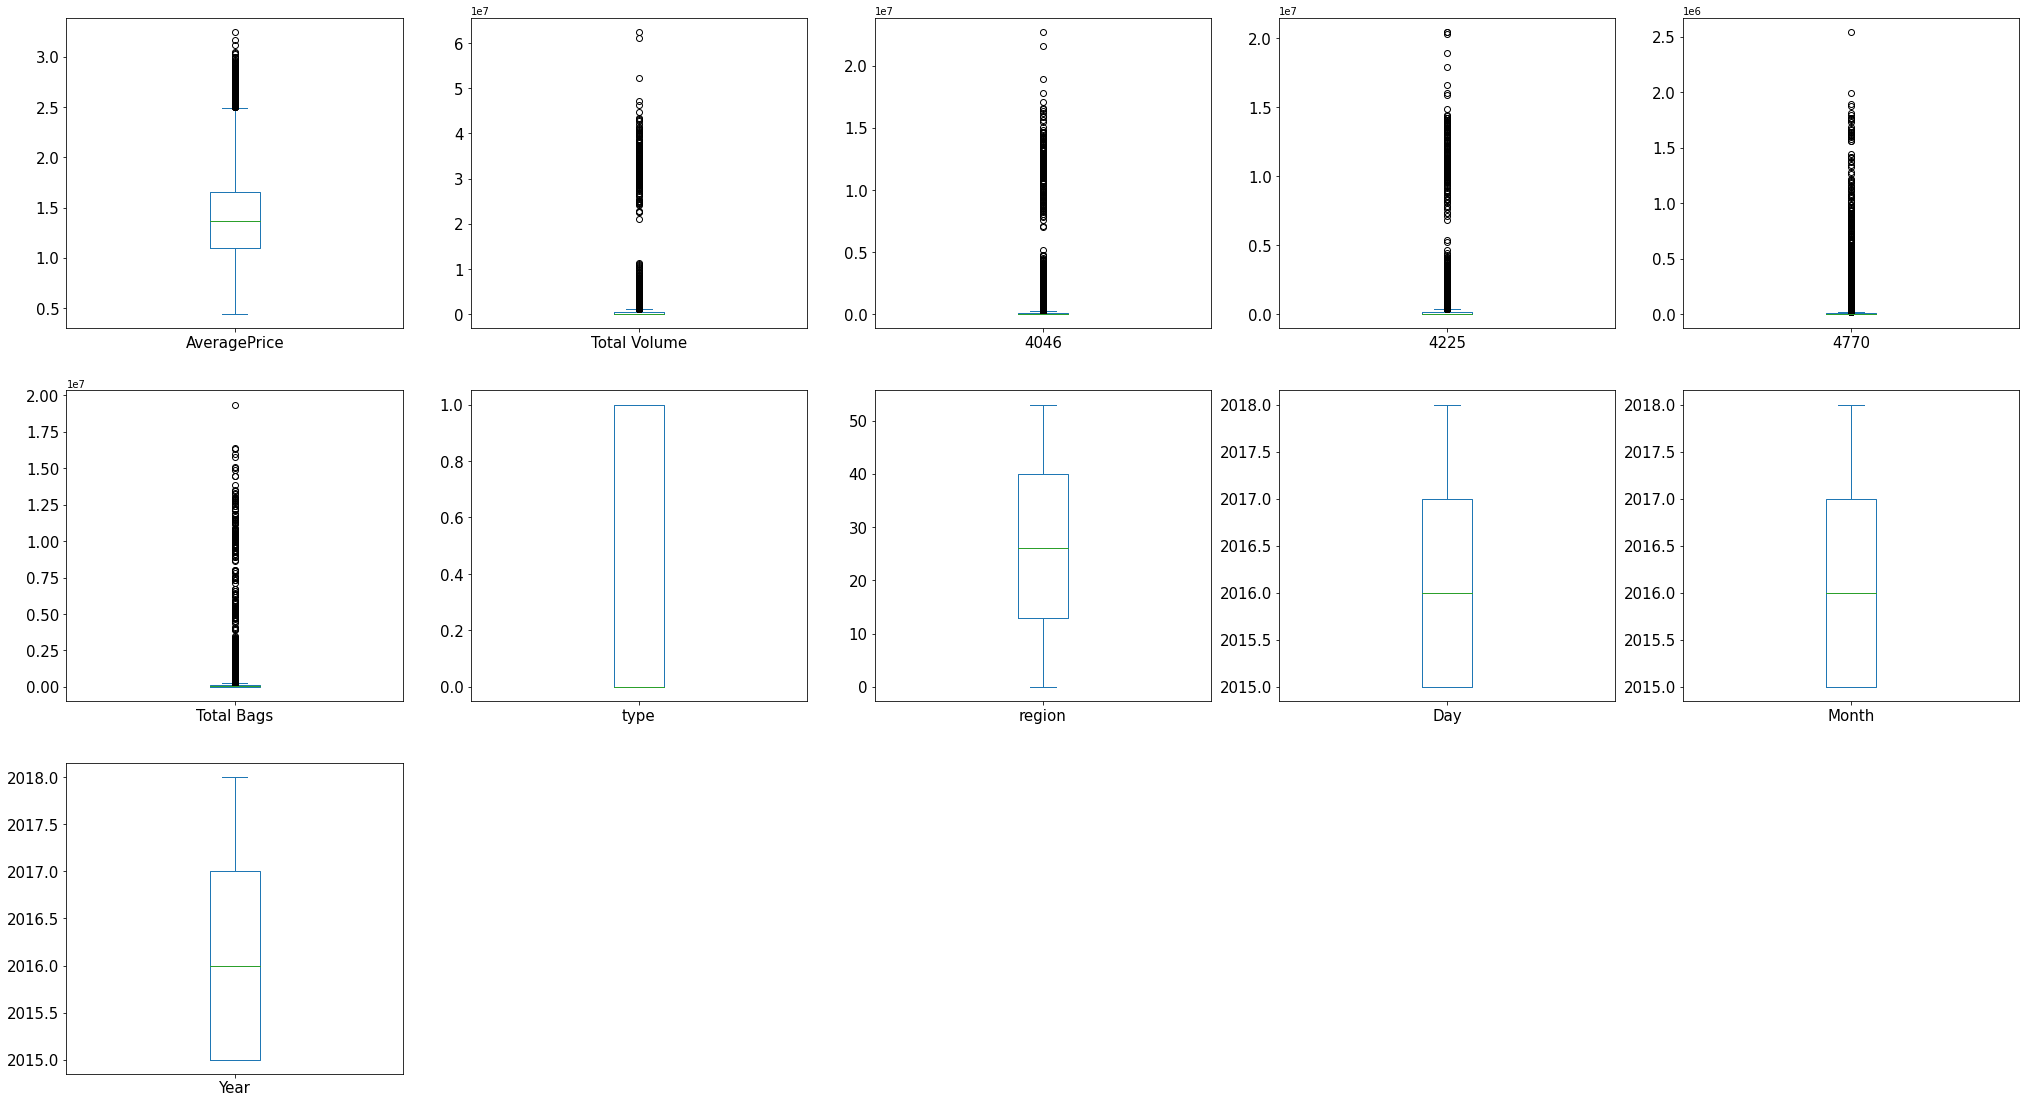

In [38]:
df.plot(kind="box", subplots=True, layout=(6,5), figsize=(35,40), fontsize=15)
plt.show()

In [39]:
from scipy.stats import zscore
#importing the zscore from the scipy libary

In [40]:
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.999836,1.700252,1.221282,1.221282,1.221282
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.999836,1.700252,1.221282,1.221282,1.221282
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.999836,1.700252,1.221282,1.221282,1.221282
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.999836,1.700252,1.221282,1.221282,1.221282
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.999836,1.700252,1.221282,1.221282,1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,1.000164,1.700811,1.970504,1.970504,1.970504
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,1.000164,1.700811,1.970504,1.970504,1.970504
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,1.000164,1.700811,1.970504,1.970504,1.970504
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,1.000164,1.700811,1.970504,1.970504,1.970504


In [41]:
print(np.where(z>3))



(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


Printing the integer location of all the values that have Standard Deviation greater than +3
These points determine the point of outliers

In [42]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,2015,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,2015,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,2015,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,2015,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2018,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,2018,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,2018,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,2018,2018


In [43]:
df.shape

(18249, 11)

In [44]:
df_new.shape

(17823, 11)

In [45]:
data_loss=((18249-17823)/18249)*100
data_loss

2.3343744862732203

In [46]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,2015,2015,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,2015,2015,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0,2015,2015,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0,2015,2015,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0,2015,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,53,2018,2018,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,53,2018,2018,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,53,2018,2018,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,53,2018,2018,2018


# skew treatment:

In [47]:
df_new.skew()

AveragePrice    0.384974
Total Volume    3.638205
4046            4.450558
4225            4.128335
4770            4.792655
Total Bags      4.330215
type           -0.018069
region          0.012571
Day             0.221932
Month           0.221932
Year            0.221932
dtype: float64

checking the skewness of the Dataset

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
x_new=power_transform(df_new)
df1_new=pd.DataFrame(x_new,columns=df_new.columns)

now we get the target data with skewness with in range

In [50]:
df1_new.skew()

AveragePrice    0.000982
Total Volume   -0.005321
4046           -0.037545
4225           -0.044071
4770            0.021688
Total Bags     -0.017007
type           -0.018069
region         -0.257902
Day             0.000000
Month           0.000000
Year            0.000000
dtype: float64

In [51]:
df_new.skew()

AveragePrice    0.384974
Total Volume    3.638205
4046            4.450558
4225            4.128335
4770            4.792655
Total Bags      4.330215
type           -0.018069
region          0.012571
Day             0.221932
Month           0.221932
Year            0.221932
dtype: float64

In [52]:
df_new=df1_new

In [53]:
df_new.skew()

AveragePrice    0.000982
Total Volume   -0.005321
4046           -0.037545
4225           -0.044071
4770            0.021688
Total Bags     -0.017007
type           -0.018069
region         -0.257902
Day             0.000000
Month           0.000000
Year            0.000000
dtype: float64

# Splitting the Data with train and test
Model Building using Linear Regression:-

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing the Algorithms & Evolution Matrix

In [55]:
x=df_new.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,-0.088243,-0.664613,0.331500,-0.238449,-0.540677,-1.009074,-2.011151,0.0,0.0,0.0
1,-0.159469,-0.783404,0.250795,-0.191497,-0.501737,-1.009074,-2.011151,0.0,0.0,0.0
2,0.188448,-0.738354,0.624691,0.006138,-0.569238,-1.009074,-2.011151,0.0,0.0,0.0
3,0.005408,-0.640000,0.447069,-0.137869,-0.714684,-1.009074,-2.011151,0.0,0.0,0.0
4,-0.192228,-0.691467,0.243515,-0.127278,-0.688122,-1.009074,-2.011151,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17818,-0.684855,-0.471099,-0.931684,-1.233817,-0.346113,0.991007,1.567022,0.0,0.0,0.0
17819,-0.777331,-0.625556,-0.678256,-1.233817,-0.512992,0.991007,1.567022,0.0,0.0,0.0
17820,-0.781254,-0.625504,-0.785644,0.425431,-0.506914,0.991007,1.567022,0.0,0.0,0.0
17821,-0.708269,-0.555204,-0.723634,0.425121,-0.438567,0.991007,1.567022,0.0,0.0,0.0


In [56]:
y=df_new.iloc[:,0]
y

0       -0.107394
1       -0.053940
2       -1.289950
3       -0.818956
4       -0.243144
           ...   
17818    0.648388
17819    0.834814
17820    1.191084
17821    1.319388
17822    0.624671
Name: AveragePrice, Length: 17823, dtype: float64

In [57]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=r2_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.4874448476338459 on Random State  152


Finding the Best Random State with Maximum Accuracy

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=458)

In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr_pred=lr.predict(x_test)
lr_pred

array([ 0.41616047,  0.89830545, -0.14803018, ...,  0.63784788,
        0.4977363 , -0.84788068])

In [61]:
print(r2_score(y_test,lr_pred))

0.47459235020949775


# Modeling Building using other Regressors

In [62]:
from sklearn.tree import DecisionTreeRegressor

# Importing Decision Tree Regressor Modelfrom sklearn.tree import DecisionTreeRegressor

# Importing Decision Tree Regressor Model

In [63]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    preddtr_train=dtr.predict(x_train)
    preddtr_test=dtr.predict(x_test)
    acc=r2_score(y_test,preddtr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.6787283981088443 on Random State  112


Finding the Best Random State with Maximum Accuracy

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=145)

In [65]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [66]:
dtr_pred=dtr.predict(x_test)
dtr_pred

array([-1.12884602,  0.28238529,  0.02536132, ..., -0.24314409,
        1.03782336,  0.74232686])

The R2 Accuracy Score of Decision Tree Regressor Model

# Extra Trees Regressor:

In [67]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    etr=ExtraTreesRegressor()
    etr.fit(x_train,y_train)
    predetr_train=etr.predict(x_train)
    predetr_test=etr.predict(x_test)
    acc=r2_score(y_test,predetr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Finding the Best Random State with Maximum Accuracy

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=409)

In [ ]:
# Training the Extra Trees Regressor Model
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)

In [ ]:
# The Extra Trees Regressor Model predicting values based on training
etr_pred=etr.predict(x_test)
etr_pred

In [ ]:
# The R2 Accuracy Score of Extra Trees Regressor Model
print(r2_score(y_test,etr_pred))

In [ ]:
# Importing K Neighbors Regressor Model
K Neighbors Regressor:-
from sklearn.neighbors import KNeighborsR

In [ ]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    acc=r2_score(y_test,predknn_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Finding the Best Random State with Maximum Accuracy

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=97)

In [ ]:
# Training the K Neighbors Regressor Model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

In [ ]:
# The K Neighbors Regressor Model predicting the values based on training
knn_pred=knn.predict(x_test)
knn_pred

In [ ]:
# The R2 Accuracy Score of K Neighbors Regressor Model
print(r2_score(y_test,knn_pred))


# Cross Validation:-

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scr1=cross_val_score(lr,x,y,cv=5)
scr1

In [ ]:
print("The Cross Validation Score of Linear Regression Model is :", scr1.mean())

The Cross Validation Score of Linear Regression Model is : -0.0013938585879490705

In [ ]:
scr2=cross_val_score(dtr,x,y,cv=5)
scr2

In [ ]:
print("The Cross Validation Score of Decision Tree Regressor Model is :", scr2.mean())

The Cross Validation Score of Decision Tree Regressor Model is : -0.4662244617878465

In [ ]:
scr3=cross_val_score(etr,x,y,cv=5)
scr3

In [ ]:
print("The Cross Validation Score of Extra Trees Regressor Model is :", scr3.mean())

The Cross Validation Score of Extra Trees Regressor Model is : 0.02149410975782946

In [ ]:
scr4=cross_val_score(knn,x,y,cv=5)
scr4

In [ ]:
print("The Cross Validation Score of K Neighbors Regressor Model is :", scr4.mean())

The Cross Validation Score of Extra Trees Regressor Model is : 0.02149410975782946

# Hyper Parameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["mse"],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}

the parameters to find the best R2 Score

In [ ]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
final_model=ExtraTreesRegressor(criterion="mse", max_depth=9, min_samples_leaf=2, min_samples_split=6,n_estimators=9)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=r2_score(y_test,final_model_pred)
print(acc*100)

the Best R2 Accuracy Score is 64.79787212754951

# Saving The Model:

 importing the Joblib function to perform Serialization

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model,"Avocado_Model.obj")


Dumping the Final model for deployment into the object file "Avocado_Model.obj"